In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Set style for better looking plots
plt.style.use('ggplot')
sns.set_palette("inferno")

In [2]:
df = pd.read_csv("orders.csv")
df.head()

,orderNumber,orderDate,requiredDate,shippedDate,status,comments,customerNumber
0,10100,2003-01-06,2003-01-13,2003-01-10,Shipped,NaN,363
1,10101,2003-01-09,2003-01-18,2003-01-11,Shipped,Check on availability.,128
2,10102,2003-01-10,2003-01-18,2003-01-14,Shipped,NaN,181
3,10103,2003-01-29,2003-02-07,2003-02-02,Shipped,NaN,121
4,10104,2003-01-31,2003-02-09,2003-02-01,Shipped,NaN,141


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   orderNumber     326 non-null    int64 
 1   orderDate       326 non-null    object
 2   requiredDate    326 non-null    object
 3   shippedDate     312 non-null    object
 4   status          326 non-null    object
 5   comments        80 non-null     object
 6   customerNumber  326 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 18.0+ KB


,orderNumber,customerNumber
count,326.000000,326.000000
mean,10262.500000,263.834356
std,94.252321,121.325792
min,10100.000000,103.000000
25%,10181.250000,145.250000
50%,10262.500000,240.000000
75%,10343.750000,360.750000
max,10425.000000,496.000000


In [4]:
df['orderDate'] = pd.to_datetime(df['orderDate'])
df['requiredDate'] = pd.to_datetime(df['requiredDate'])
df['shippedDate'] = pd.to_datetime(df['shippedDate'])

In [5]:
df.isnull().sum()
df['comments'] = df['comments'].fillna("No Comments")

In [6]:
df['delivery_days'] = (df['shippedDate'] - df['orderDate']).dt.days

In [11]:
df['status'].value_counts()

status
Shipped       303
Cancelled       6
In Process      6
Resolved        4
On Hold         4
Disputed        3
Name: count, dtype: int64

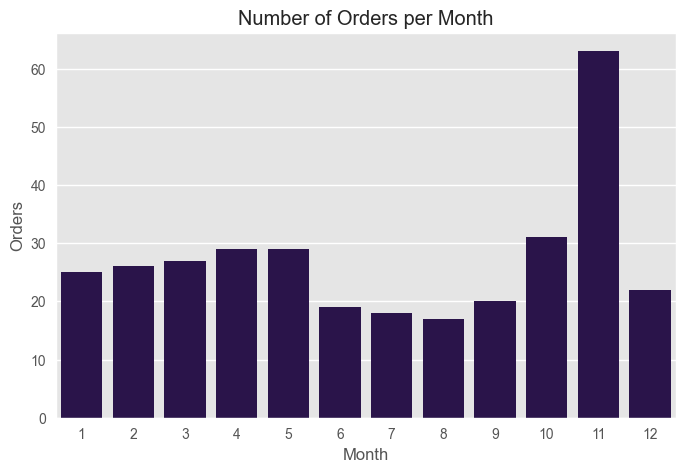

In [31]:
df['month'] = df['orderDate'].dt.month

plt.figure(figsize=(8,5))
sns.countplot(x='month', data=df)
plt.title("Number of Orders per Month")
plt.xlabel("Month")
plt.ylabel("Orders")
plt.show()

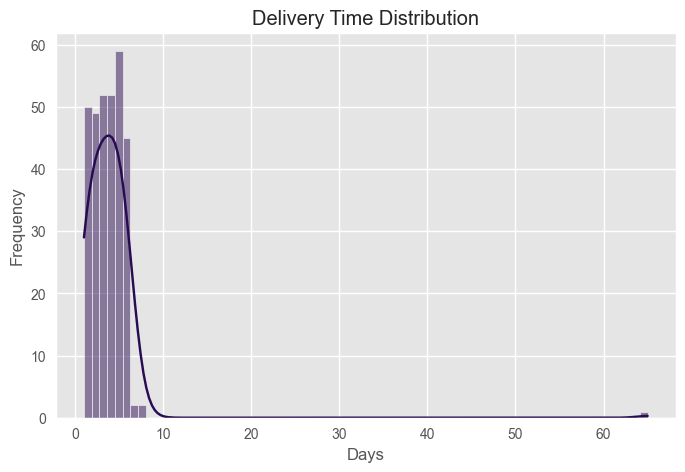

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['delivery_days'], kde=True)
plt.title("Delivery Time Distribution")
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

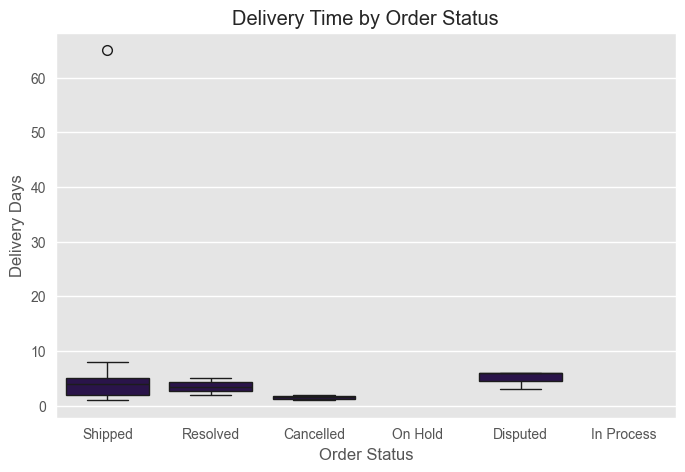

In [33]:
plt.figure(figsize=(8,5))
sns.boxplot(x='status', y='delivery_days', data=df)
plt.title("Delivery Time by Order Status")
plt.xlabel("Order Status")
plt.ylabel("Delivery Days")
plt.show()